Manually calculate the prices of the following options step by step using two-step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

To derive the price of european options using the two-step Cox-Ross Rubinstein binomial tree, the following parameters are required:

* S: Spot price of asset
* K: Strike price of option
* r: Interest rate
* T: Time to maturity
* $\sigma$: Volatility of asset

We calibrate the CRR Binomial Tree model to the Black-Scholes, by matching the 2nd moment (Variance).

\begin{equation}
\begin{split}
pS_u^2 + \left(1-p\right)S_d^2 - S_0^2e^{2rT} = S_0^2e^{2rt}e^{\sigma^2t} - S_0^2e^{2rt}
\end{split}            
\end{equation}

By solving the quadratic equations that arise, we can find the solutions that correspond to u and d, where:

\begin{equation}
\begin{split}
b = e^{rT + \sigma^{2}T} + e^{-rT} \\
u =\frac{b + \sqrt{b^2 - 4}}{2} \\
d = \frac{1}{u} = \frac{b - \sqrt{b^2 - 4}}{2} \\
\end{split}            
\end{equation}

With the above solution, we can plug in the parameters to solve for the stock prices and thereafter use the backward induction to calculate the discounted option price.

### a)

b = 2.02073

u = 1.15472

d = 0.86601

p = 0.51644

df = 0.9851

$S_0 = 100$

Stock price:

$S_{1,0} = uS_0 = 115.4723$

$S_{1,1} = dS_0 = 86.60083$

$S_{2,0} = uuS_0 = 133.3386$

$S_{2,1} = udS_0 = 100.0$

$S_{2,2} = ddS_0 = 74.9970$

Option price:

$C_{2,0} = max(0, uuS_0 - K) = 28.3386$

$C_{2,1} = max(0, udS_0 - K) = 0$

$C_{2,2} = max(0, ddS_0 - K) = 0$

$C_{1,0} = \left(p \times C_{2,0} + (1 - p) \times C_{2,1}\right) \times df = 14.4174$

$C_{1,1} = \left(p \times C_{2,1} + (1 - p) \times C_{2,2}\right) \times df = 0$

$C_0 = \left(p \times C_{1,0} + (1 - p) \times C_{1,1}\right) \times df = 7.3349$

### b)

We can do the backward induction for a put option as well:

Option price:

$P_{2,0} = max(0, K - uuS_0) = 0$

$P_{2,1} = max(0, K - udS_0) = 5$

$P_{2,2} = max(0, K - ddS_0) = 30.0030$

$P_{1,0} = \left(p \times P_{2,0} + (1 - p) \times P_{2,1}\right) \times df = 2.3818$

$P_{1,1} = \left(p \times P_{2,1} + (1 - p) \times P_{2,2}\right) \times df = 16.8359$

$P_0 = \left(p \times P_{1,0} + (1 - p) \times P_{1,1}\right) \times df = 9.2317$

### c)

c and d have the same parameters, except for $\sigma$:

b = 2.00531

u = 1.0756

d = 0.92972

p = 0.58539

df = 0.9851

$S_0 = 100$

Stock price:

$S_{1,0} = uS_0 = 107.5597$

$S_{1,1} = dS_0 = 92.9716$

$S_{2,0} = uuS_0 = 115.6910$

$S_{2,1} = udS_0 = 100.0$

$S_{2,2} = ddS_0 = 86.4372$

Option price:

$C_{2,0} = max(0, uuS_0 - K) = 10.6910$

$C_{2,1} = max(0, udS_0 - K) = 0$

$C_{2,2} = max(0, ddS_0 - K) = 0$

$C_{1,0} = \left(p \times C_{2,0} + (1 - p) \times C_{2,1}\right) \times df = 6.1652$

$C_{1,1} = \left(p \times C_{2,1} + (1 - p) \times C_{2,2}\right) \times df = 0$

$C_0 = \left(p \times C_{1,0} + (1 - p) \times C_{1,1}\right) \times df = 3.5553$

### d)


Option price:

$P_{2,0} = max(0, K - uuS_0) = 0$

$P_{2,1} = max(0, K - udS_0) = 5$

$P_{2,2} = max(0, K - ddS_0) = 18.5628$

$P_{1,0} = \left(p \times P_{2,0} + (1 - p) \times P_{2,1}\right) \times df = 2.0422$

$P_{1,1} = \left(p \times P_{2,1} + (1 - p) \times P_{2,2}\right) \times df = 10.4652$

$P_0 = \left(p \times P_{1,0} + (1 - p) \times P_{1,1}\right) \times df = 5.4521$

In [305]:
import numpy as np

S, K, r, T, vol = 100, 105, 0.03, 1, 0.2
N = 2
t = T/N

b = np.exp(r*t + vol**2*t) + np.exp(-r*t)
u = (b + np.sqrt(b**2 - 4)) / 2
d = 1/u
p = (np.exp(r*t) - d) / (u - d)
df = np.exp(-r*t)

S1_0 = u * S
S1_1 = d * S
S2_0 = u**2*S
S2_1 = u*d*S
S2_2 = d**2*S

# A: Call option
C2_0 = max(0,S2_0 - K)
C2_1 = max(0,S2_1 - K)
C2_2 = max(0,S2_2 - K)
C1_0 = (p * C2_0 + (1-p) * C2_1) * df
C1_1 = (p * C2_1 + (1-p) * C2_2) * df
C = (p * C1_0 + (1-p) * C1_1) * df

# B: Put option
P2_0 = max(0,K - S2_0)
P2_1 = max(0,K - S2_1)
P2_2 = max(0,K - S2_2)
P1_0 = (p * P2_0 + (1-p) * P2_1) * df
P1_1 = (p * P2_1 + (1-p) * P2_2) * df
P = (p * P1_0 + (1-p) * P1_1) * df

print('Call option price: '+str(C))
print('Put option price: '+str(P))

Call option price: 7.334893644625005
Put option price: 9.231674667218368


In [306]:
S, K, r, T, vol = 100, 105, 0.03, 1, 0.1
N = 2
t = T/N

b = np.exp(r*t + vol**2*t) + np.exp(-r*t)
u = (b + np.sqrt(b**2 - 4)) / 2
d = 1/u
p = (np.exp(r*t) - d) / (u - d)
df = np.exp(-r*t)

S1_0 = u * S
S1_1 = d * S
S2_0 = u**2*S
S2_1 = u*d*S
S2_2 = d**2*S

# A: Call option
C2_0 = max(0,S2_0 - K)
C2_1 = max(0,S2_1 - K)
C2_2 = max(0,S2_2 - K)
C1_0 = (p * C2_0 + (1-p) * C2_1) * df
C1_1 = (p * C2_1 + (1-p) * C2_2) * df
C = (p * C1_0 + (1-p) * C1_1) * df

# B: Put option
P2_0 = max(0,K - S2_0)
P2_1 = max(0,K - S2_1)
P2_2 = max(0,K - S2_2)
P1_0 = (p * P2_0 + (1-p) * P2_1) * df
P1_1 = (p * P2_1 + (1-p) * P2_2) * df
P = (p * P1_0 + (1-p) * P1_1) * df

print('Call option price: '+str(C))
print('Put option price: '+str(P))

Call option price: 3.555283800757024
Put option price: 5.452064823350394


### We can formally verify the prices derived manually with the crrBinomial pricer below and input the parameters.

In [135]:
from enum import Enum
import math

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

def crrBinomial(S, r, vol, payoffType, K, T, n):
    t = T / n
    b = math.exp(vol * vol * t+r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    # set up the last time slice, there are n+1 nodes at the last time slice
    payoffDict = {
        PayoffType.Call: lambda s: max(s-K, 0),
        PayoffType.Put: lambda s: max(K-s, 0),
    }
    vs = [payoffDict[payoffType]( S * u**(n-i-i)) for i in range(n+1)]
    # iterate backward
    for i in range(n-1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i+1):
            vs[j] = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
    return vs[0]
# test ---
S, r, vol1, vol2, K, T = 100, 0.03, 0.2, 0.1, 105, 1.0
print("crrNStepTree: \t", crrBinomial(S, r, vol1, PayoffType.Call, K, T, 2))
print("crrNStepTree: \t", crrBinomial(S, r, vol1, PayoffType.Put, K, T, 2))
print("crrNStepTree: \t", crrBinomial(S, r, vol2, PayoffType.Call, K, T, 2))
print("crrNStepTree: \t", crrBinomial(S, r, vol2, PayoffType.Put, K, T, 2))

crrNStepTree: 	 7.334893644625005
crrNStepTree: 	 9.231674667218368
crrNStepTree: 	 3.555283800757024
crrNStepTree: 	 5.452064823350394


### Portfolio values

In [136]:
A = crrBinomial(S, r, vol1, PayoffType.Call, K, T, 2)
B = crrBinomial(S, r, vol1, PayoffType.Put, K, T, 2)
C = crrBinomial(S, r, vol2, PayoffType.Call, K, T, 2)
D = crrBinomial(S, r, vol2, PayoffType.Put, K, T, 2)

portfolio1 = A - B
portfolio2 = C - D

print(portfolio1)
print(portfolio2)

-1.8967810225933626
-1.8967810225933701


3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks (risk sensitivities) are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.

  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

    \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
    \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [264]:
class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

class greekType(str, Enum):
    Delta = 'Delta'
    Gamma = 'Gamma'
    Vega = 'Vega'
    Theta = 'Theta'
    Rho = 'Rho'

# binomial pricer for exercise 3
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

# added parameters into the given function signature, to facilitate other binomial models
# added greek parameters required for numerical calculation instead of hard-coding static values
def binomialGreeks(S, r, vol, T, strike, greekType, payoffType, isAmer, n, calib, dS, dvol, dt, dr) -> float:
    import copy
    if isAmer:
        if payoffType == PayoffType.Call:
            trade = AmericanOption(T, strike, PayoffType.Call)
        else:
            trade = AmericanOption(T, strike, PayoffType.Put)
    else:
        if payoffType == PayoffType.Call:
            trade = EuropeanOption(T, strike, PayoffType.Call)
        else:
            trade = EuropeanOption(T, strike, PayoffType.Put)

    if greekType == greekType.Delta:
        return (binomialPricer(S + dS, r, vol, trade, n, calib) - binomialPricer(S - dS, r, vol, trade, n, calib)) / (2*dS)
    if greekType == greekType.Gamma:
        return (binomialPricer(S + dS, r, vol, trade, n, calib) - 2*binomialPricer(S, r, vol, trade, n, calib) + binomialPricer(S - dS, r, vol, trade, n, calib)) / (dS**2)
    if greekType == greekType.Vega:
        return (binomialPricer(S, r, vol + dvol, trade, n, calib) - binomialPricer(S, r, vol - dvol, trade, n, calib)) / (2*dvol)
    if greekType == greekType.Theta:
        trade1 = copy.copy(trade)
        trade1.expiry = trade1.expiry - dt
        return (binomialPricer(S, r, vol, trade1, n, calib) - binomialPricer(S, r, vol, trade, n, calib)) / dt
    if greekType == greekType.Rho:
        return (binomialPricer(S, r + dr, vol, trade, n, calib) - binomialPricer(S, r - dr, vol, trade, n, calib)) / (2*dr)
    else:
        return None

In [265]:
# n was not given, using n = 300 as in lecture slides
S, r, vol, T, strike, n = 100, 0.03, 0.2, 1, 105, 300
dS_factor, dvol, dt, dr = 0.001, 0.001, 0.004, 0.0001 

print('Delta: '+ str(binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr)))
print('Gamma: '+ str(binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr)))
print('Vega: '+ str(binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr)))
print('Theta: '+ str(binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr)))
print('Rho: '+ str(binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr)))

Delta: 0.4846810731209228
Gamma: 0.0
Vega: 39.457853524887284
Theta: -5.2436548383869575
Rho: 43.13156637794968


### European Option Greeks across binomial models

In [275]:
# delta as function of strike across different binomial models 
crrEuroCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrEuroPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# gamma as function of strike across different binomial models 
crrEuroCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrEuroPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Vega as function of strike across different binomial models 
crrEuroCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrEuroPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Theta as function of strike across different binomial models 
crrEuroCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrEuroPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Rho as function of strike across different binomial models 
crrEuroCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrEuroPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, False, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnEuroPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, False, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqEuroPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, False, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianEuroPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, False, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

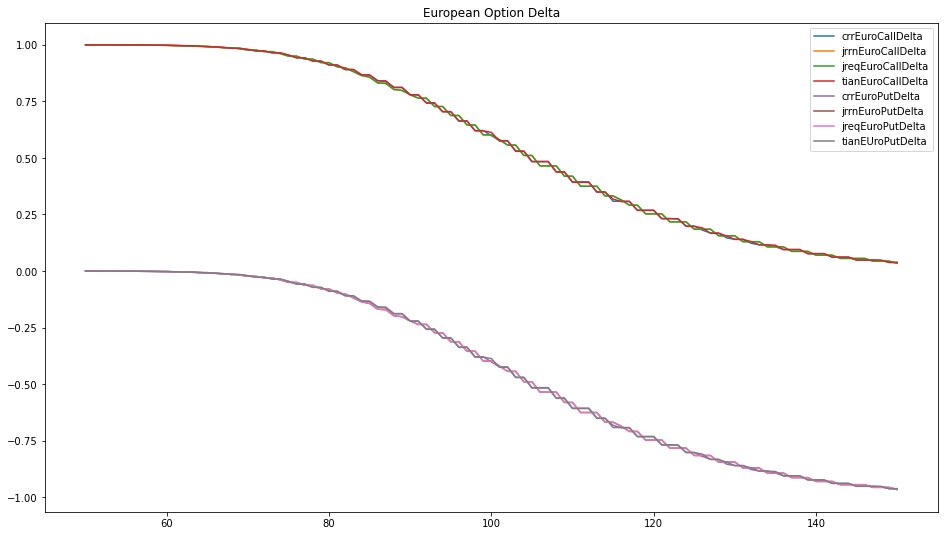

In [276]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('European Option Delta')
plt.plot(range(50,151),crrEuroCallDelta, label='crrEuroCallDelta')
plt.plot(range(50,151),jrrnEuroCallDelta, label='jrrnEuroCallDelta')
plt.plot(range(50,151),jreqEuroCallDelta, label='jreqEuroCallDelta')
plt.plot(range(50,151),tianEuroCallDelta, label='tianEuroCallDelta')
plt.plot(range(50,151),crrEuroPutDelta, label='crrEuroPutDelta')
plt.plot(range(50,151),jrrnEuroPutDelta, label='jrrnEuroPutDelta')
plt.plot(range(50,151),jreqEuroPutDelta, label='jreqEuroPutDelta')
plt.plot(range(50,151),tianEuroPutDelta, label='tianEUroPutDelta')
plt.legend()
plt.show()

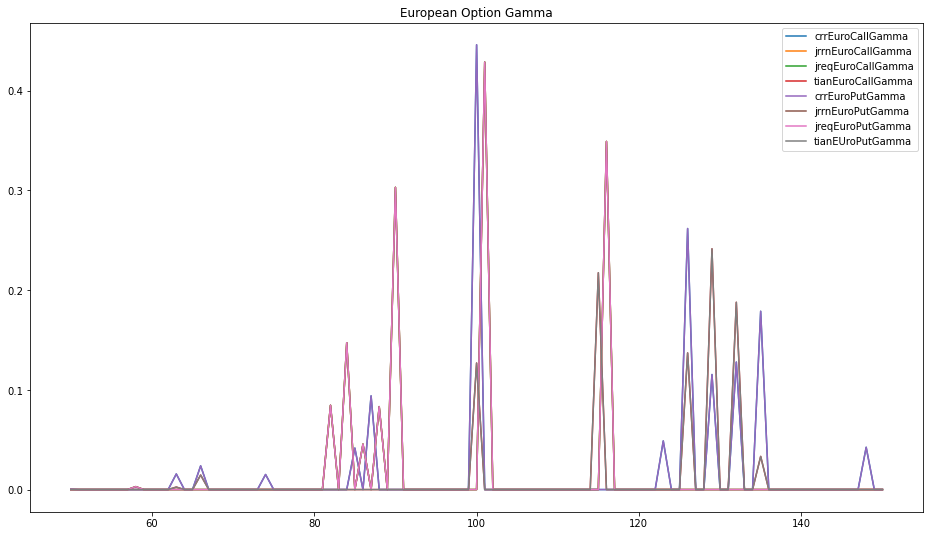

In [279]:
plt.figure(figsize=(16,9))
plt.title('European Option Gamma')
plt.plot(range(50,151),crrEuroCallGamma, label='crrEuroCallGamma')
plt.plot(range(50,151),jrrnEuroCallGamma, label='jrrnEuroCallGamma')
plt.plot(range(50,151),jreqEuroCallGamma, label='jreqEuroCallGamma')
plt.plot(range(50,151),tianEuroCallGamma, label='tianEuroCallGamma')
plt.plot(range(50,151),crrEuroPutGamma, label='crrEuroPutGamma')
plt.plot(range(50,151),jrrnEuroPutGamma, label='jrrnEuroPutGamma')
plt.plot(range(50,151),jreqEuroPutGamma, label='jreqEuroPutGamma')
plt.plot(range(50,151),tianEuroPutGamma, label='tianEUroPutGamma')
plt.legend()
plt.show()

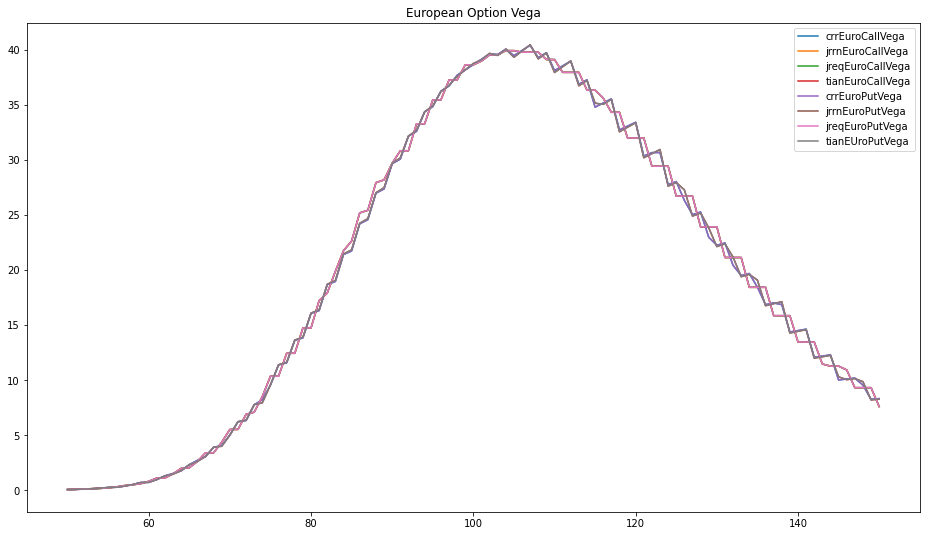

In [280]:
plt.figure(figsize=(16,9))
plt.title('European Option Vega')
plt.plot(range(50,151),crrEuroCallVega, label='crrEuroCallVega')
plt.plot(range(50,151),jrrnEuroCallVega, label='jrrnEuroCallVega')
plt.plot(range(50,151),jreqEuroCallVega, label='jreqEuroCallVega')
plt.plot(range(50,151),tianEuroCallVega, label='tianEuroCallVega')
plt.plot(range(50,151),crrEuroPutVega, label='crrEuroPutVega')
plt.plot(range(50,151),jrrnEuroPutVega, label='jrrnEuroPutVega')
plt.plot(range(50,151),jreqEuroPutVega, label='jreqEuroPutVega')
plt.plot(range(50,151),tianEuroPutVega, label='tianEUroPutVega')
plt.legend()
plt.show()

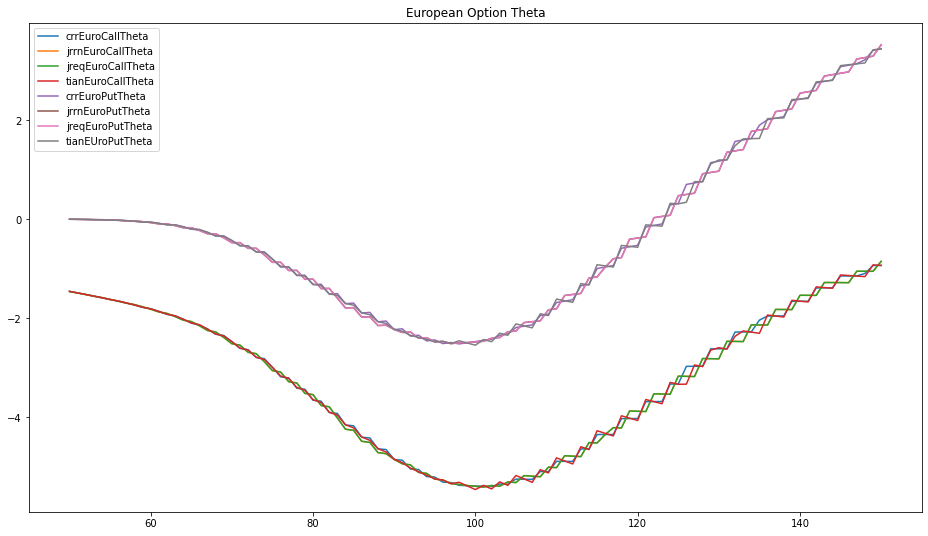

In [281]:
plt.figure(figsize=(16,9))
plt.title('European Option Theta')
plt.plot(range(50,151),crrEuroCallTheta, label='crrEuroCallTheta')
plt.plot(range(50,151),jrrnEuroCallTheta, label='jrrnEuroCallTheta')
plt.plot(range(50,151),jreqEuroCallTheta, label='jreqEuroCallTheta')
plt.plot(range(50,151),tianEuroCallTheta, label='tianEuroCallTheta')
plt.plot(range(50,151),crrEuroPutTheta, label='crrEuroPutTheta')
plt.plot(range(50,151),jrrnEuroPutTheta, label='jrrnEuroPutTheta')
plt.plot(range(50,151),jreqEuroPutTheta, label='jreqEuroPutTheta')
plt.plot(range(50,151),tianEuroPutTheta, label='tianEUroPutTheta')
plt.legend()
plt.show()

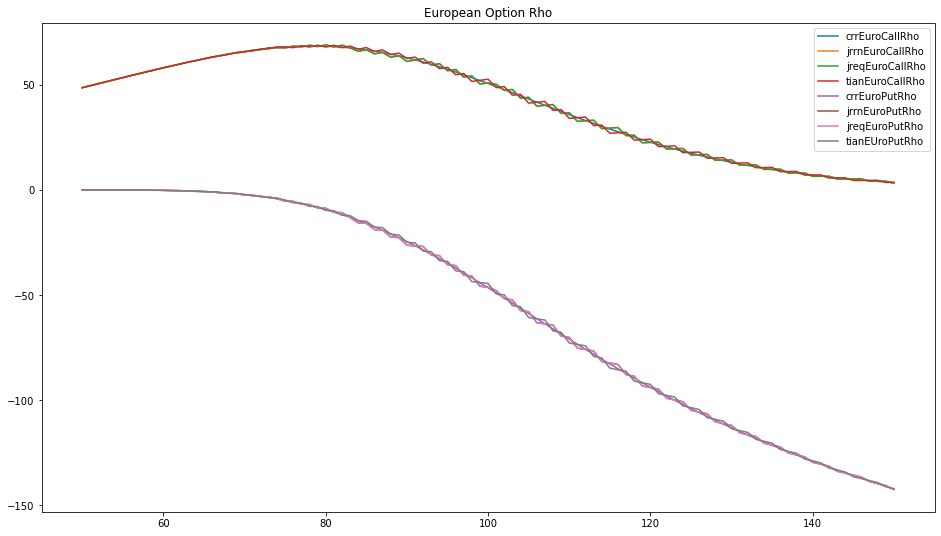

In [282]:
plt.figure(figsize=(16,9))
plt.title('European Option Rho')
plt.plot(range(50,151),crrEuroCallRho, label='crrEuroCallRho')
plt.plot(range(50,151),jrrnEuroCallRho, label='jrrnEuroCallRho')
plt.plot(range(50,151),jreqEuroCallRho, label='jreqEuroCallRho')
plt.plot(range(50,151),tianEuroCallRho, label='tianEuroCallRho')
plt.plot(range(50,151),crrEuroPutRho, label='crrEuroPutRho')
plt.plot(range(50,151),jrrnEuroPutRho, label='jrrnEuroPutRho')
plt.plot(range(50,151),jreqEuroPutRho, label='jreqEuroPutRho')
plt.plot(range(50,151),tianEuroPutRho, label='tianEUroPutRho')
plt.legend()
plt.show()

### American Option Greeks across binomial models

In [283]:
# delta as function of strike across different binomial models 
crrAmerCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerCallDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Call, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrAmerPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerPutDelta = [binomialGreeks(S, r, vol, T, strike, greekType.Delta, PayoffType.Put, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# gamma as function of strike across different binomial models 
crrAmerCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerCallGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Call, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrAmerPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerPutGamma = [binomialGreeks(S, r, vol, T, strike, greekType.Gamma, PayoffType.Put, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Vega as function of strike across different binomial models 
crrAmerCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerCallVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Call, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrAmerPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerPutVega = [binomialGreeks(S, r, vol, T, strike, greekType.Vega, PayoffType.Put, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Theta as function of strike across different binomial models 
crrAmerCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerCallTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Call, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrAmerPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerPutTheta = [binomialGreeks(S, r, vol, T, strike, greekType.Theta, PayoffType.Put, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

# Rho as function of strike across different binomial models 
crrAmerCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerCallRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Call, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
crrAmerPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, True, n, crrCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jrrnAmerPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, True, n, jrrnCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
jreqAmerPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, True, n, jreqCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]
tianAmerPutRho = [binomialGreeks(S, r, vol, T, strike, greekType.Rho, PayoffType.Put, True, n, tianCalib, dS_factor*S, dvol, dt, dr) for strike in range(50,151)]

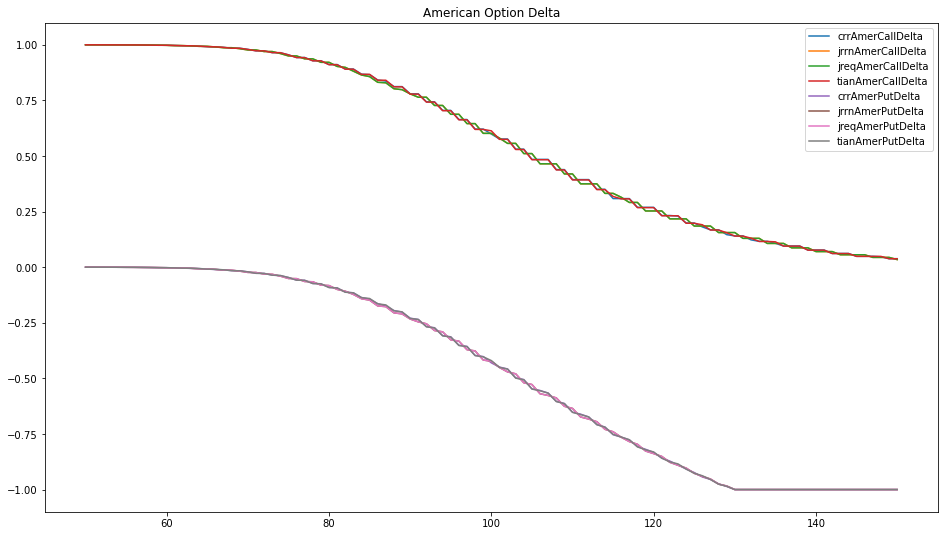

In [284]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('American Option Delta')
plt.plot(range(50,151),crrAmerCallDelta, label='crrAmerCallDelta')
plt.plot(range(50,151),jrrnAmerCallDelta, label='jrrnAmerCallDelta')
plt.plot(range(50,151),jreqAmerCallDelta, label='jreqAmerCallDelta')
plt.plot(range(50,151),tianAmerCallDelta, label='tianAmerCallDelta')
plt.plot(range(50,151),crrAmerPutDelta, label='crrAmerPutDelta')
plt.plot(range(50,151),jrrnAmerPutDelta, label='jrrnAmerPutDelta')
plt.plot(range(50,151),jreqAmerPutDelta, label='jreqAmerPutDelta')
plt.plot(range(50,151),tianAmerPutDelta, label='tianAmerPutDelta')
plt.legend()
plt.show()

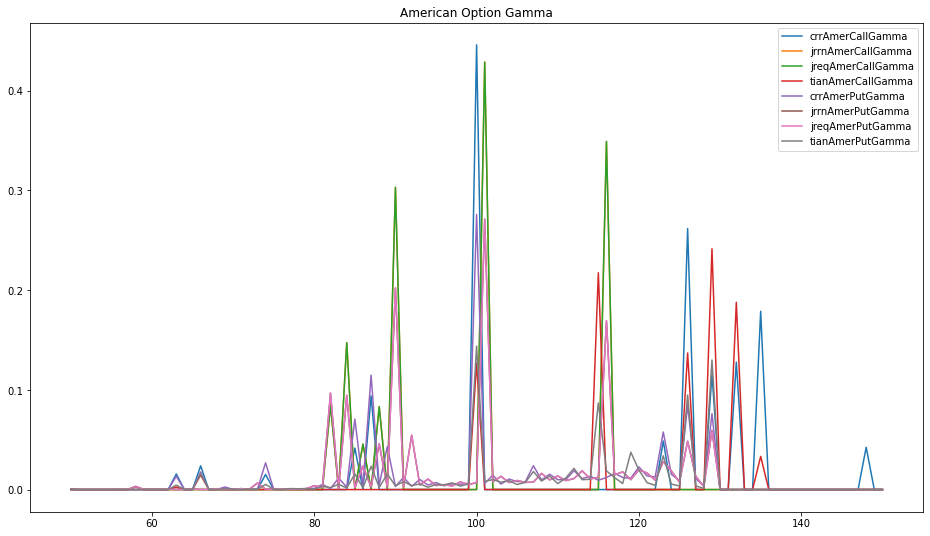

In [289]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('American Option Gamma')
plt.plot(range(50,151),crrAmerCallGamma, label='crrAmerCallGamma')
plt.plot(range(50,151),jrrnAmerCallGamma, label='jrrnAmerCallGamma')
plt.plot(range(50,151),jreqAmerCallGamma, label='jreqAmerCallGamma')
plt.plot(range(50,151),tianAmerCallGamma, label='tianAmerCallGamma')
plt.plot(range(50,151),crrAmerPutGamma, label='crrAmerPutGamma')
plt.plot(range(50,151),jrrnAmerPutGamma, label='jrrnAmerPutGamma')
plt.plot(range(50,151),jreqAmerPutGamma, label='jreqAmerPutGamma')
plt.plot(range(50,151),tianAmerPutGamma, label='tianAmerPutGamma')
plt.legend()
plt.show()

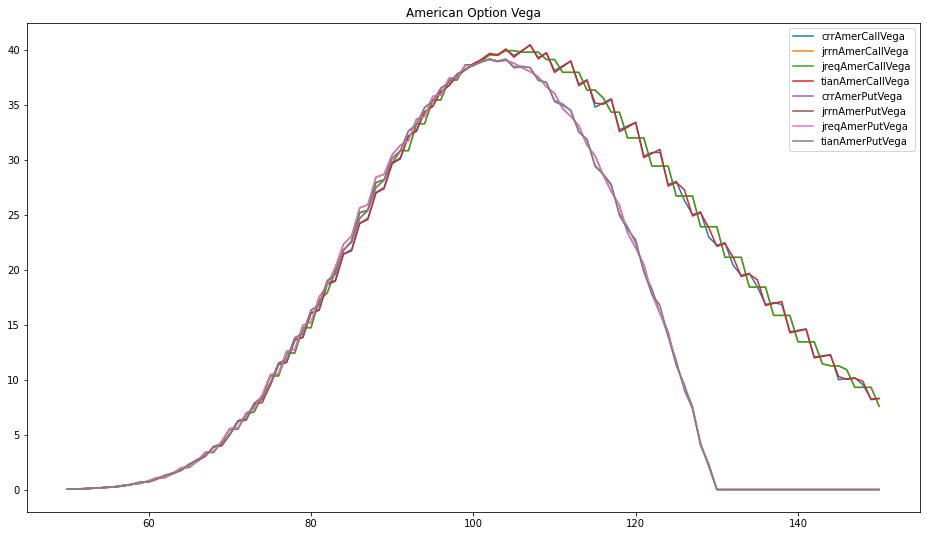

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('American Option Vega')
plt.plot(range(50,151),crrAmerCallVega, label='crrAmerCallVega')
plt.plot(range(50,151),jrrnAmerCallVega, label='jrrnAmerCallVega')
plt.plot(range(50,151),jreqAmerCallVega, label='jreqAmerCallVega')
plt.plot(range(50,151),tianAmerCallVega, label='tianAmerCallVega')
plt.plot(range(50,151),crrAmerPutVega, label='crrAmerPutVega')
plt.plot(range(50,151),jrrnAmerPutVega, label='jrrnAmerPutVega')
plt.plot(range(50,151),jreqAmerPutVega, label='jreqAmerPutVega')
plt.plot(range(50,151),tianAmerPutVega, label='tianAmerPutVega')
plt.legend()
plt.show()

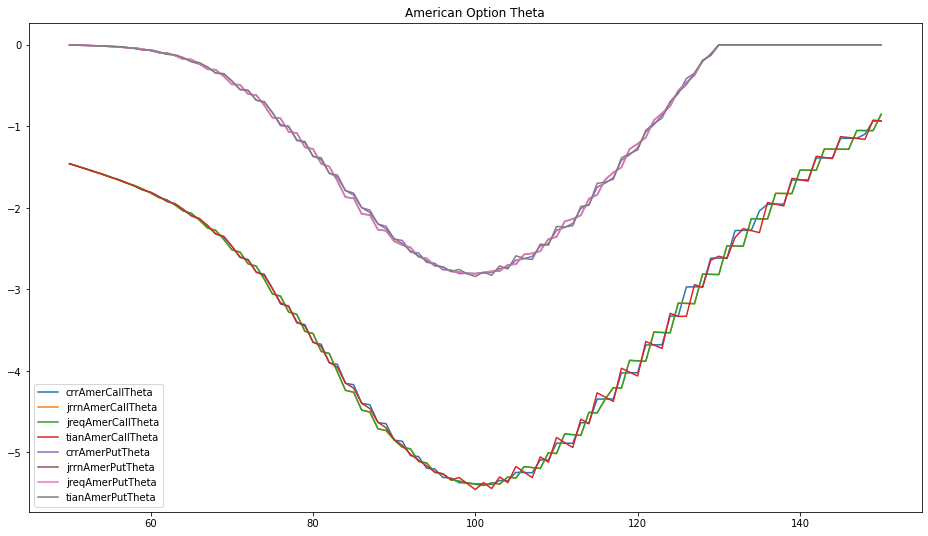

In [287]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('American Option Theta')
plt.plot(range(50,151),crrAmerCallTheta, label='crrAmerCallTheta')
plt.plot(range(50,151),jrrnAmerCallTheta, label='jrrnAmerCallTheta')
plt.plot(range(50,151),jreqAmerCallTheta, label='jreqAmerCallTheta')
plt.plot(range(50,151),tianAmerCallTheta, label='tianAmerCallTheta')
plt.plot(range(50,151),crrAmerPutTheta, label='crrAmerPutTheta')
plt.plot(range(50,151),jrrnAmerPutTheta, label='jrrnAmerPutTheta')
plt.plot(range(50,151),jreqAmerPutTheta, label='jreqAmerPutTheta')
plt.plot(range(50,151),tianAmerPutTheta, label='tianAmerPutTheta')
plt.legend()
plt.show()

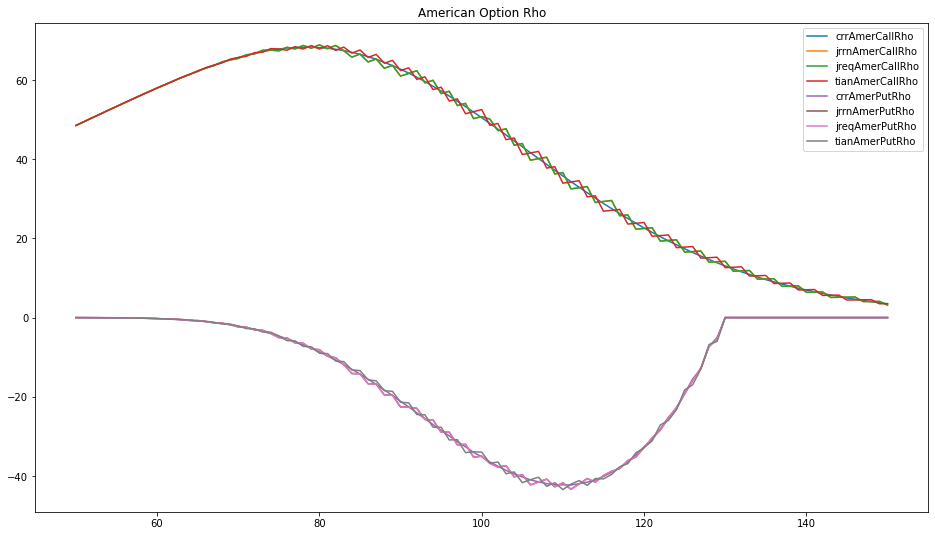

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('American Option Rho')
plt.plot(range(50,151),crrAmerCallRho, label='crrAmerCallRho')
plt.plot(range(50,151),jrrnAmerCallRho, label='jrrnAmerCallRho')
plt.plot(range(50,151),jreqAmerCallRho, label='jreqAmerCallRho')
plt.plot(range(50,151),tianAmerCallRho, label='tianAmerCallRho')
plt.plot(range(50,151),crrAmerPutRho, label='crrAmerPutRho')
plt.plot(range(50,151),jrrnAmerPutRho, label='jrrnAmerPutRho')
plt.plot(range(50,151),jreqAmerPutRho, label='jreqAmerPutRho')
plt.plot(range(50,151),tianAmerPutRho, label='tianAmerPutRho')
plt.legend()
plt.show()